## Dimensionality reduction practical

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Implementing a Principal Component Analysis (PCA)

In [4]:
class PCA(object):

    def __init__(self, K):
        self.K = K
        self.explained_variance_ = np.array([])
        self.explained_variance_ratio_ = np.array([])
        self.eigenvectors_ = np.array([])
    
    def compute_scatter_matrix(self, X, mean_vector):
        """
        param X: numpy array of shape (M,N)
        param y: numpy array of shape (N), shows mean for each feature
        return scatter_matrix of shape (N,N)
        """
        diff = X - mean_vector
        return diff.T.dot(diff)
    
    def fit(self, X):
        """
        param X: numpy array of shape (M,N)
        """
        """TODO fit the model,
        (
            1. Computing the N-dimensional mean vector
            2. Computing the (N,N)-dimensional Scatter Matrix
            3. Computing explained variance
            4. Computing explained variance ratio
        )
         and update values of self.explained_variance_, self.explained_variance_ratio_, 
         self.eigenvectors_, self.eigenvalues_"""
        
        mean_vector = np.mean(X, axis=0)
        scatter_matrix = self.compute_scatter_matrix(X, mean_vector)
        eigenvalues, eigenvectors = np.linalg.eig(scatter_matrix)

        self.explained_variance_ = np.abs(eigenvalues)
        self.explained_variance_ratio_ = self.explained_variance_ / self.explained_variance_.sum()
        self.eigenvectors_ = eigenvectors

    def transform(self, X):
        """
        param X: numpy array of shape (M,N)
        return X_proj: numpy array of shape (M,K)
        """
        """TODO use self.explained_variance_ratio_ and self.eigenvectors_
        to project X from dimension N to K"""

        if self.eigenvectors_.shape[0] == 0:
            raise TypeError("Please fit before calling transform")
            
        sorted_eig_ind = np.argsort(-1 * self.explained_variance_ratio_)
        w = self.eigenvectors_[:,sorted_eig_ind][:, :self.K]
        return X.dot(w)

### Test custom PCA

In [5]:
X = np.arange(30).reshape(10, 3)
pca = PCA(2)
pca.fit(X)
transformed = pca.transform(X)
transformed.shape

(10, 2)

# Implementing a Linear Discriminant Analysis (LDA)

In [ ]:
class LDA(object):

    def __init__(self, K):
        self.K = K
        self.explained_variance_ = np.array([])
        self.explained_variance_ratio_ = np.array([])
        self.eigenvectors_ = np.array([])
    
    def compute_scatters(self, X, y):
        """
        param X: numpy array of shape (M,N)
        param y: numpy array of shape (M), shows to which class each row of X belongs
        return S_w, S_b: scatter within and scatter between matrices which are of shape (N,N)
        """
        raise NotImplementedError
    
    def fit(self, X, y):
        """
        param X: numpy array of shape (M,N)
        param y: numpy array of shape (M), shows to which class each row of X belongs
        """
        """TODO fit the model,(compute scatter matrices and compute 
        eigenvalues and eigenvectors of S_w^{-1}S_b) and update values of 
        self.explained_variance_, self.explained_variance_ratio_, self.eigenvectors"""
        raise NotImplementedError

    def transform(self, X):
        """
        param X: numpy array of shape (M,N)
        return X_proj: numpy array of shape (M,K)
        """
        """TODO use self.explained_variance_ratio_ and self.eigenvectors_
        to project X from dimension N to K"""
        raise NotImplementedError

## 0. Data preprocessing and visualization

1. Load the "ionosphere.csv" dataset
2. Clean the dataset, remove N/A s, uninformative columns if any
3. Construct and plot inter feature correlation matrice
4. Investigate distributions of each feature(make histogram plots), decide if the dataset needs normalization or not, if yes normalize it
5. Last column is the target column which we will predict. Map (b, g) -> (0, 1)
6. Split the dataset to train/test with 80/20 ratio


In [67]:
df = pd.read_csv('ionosphere.csv')
df = df.dropna(axis=0)
df = df.drop(['1', '0'], axis=1)
df.loc[df['g'] == 'g', 'g'] = 1
df.loc[df['g'] == 'b', 'g'] = 0

In [68]:
df.corr()

,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,0.85243.1,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0.99539,1.000000,0.143957,0.476106,0.026199,0.439608,0.010682,0.470618,0.048563,0.324097,0.171587,...,-0.071565,0.078492,0.124980,0.345337,0.059221,0.246587,-0.007202,0.264207,0.002624,0.518412
-0.05889,0.143957,1.000000,0.001477,-0.190469,-0.053673,0.254716,-0.302097,0.207541,-0.189778,0.315656,...,-0.237842,-0.047087,0.000265,-0.041292,0.342101,-0.172211,-0.123701,-0.154207,0.033991,0.126496
0.85243,0.476106,0.001477,1.000000,0.038617,0.596761,-0.028520,0.449869,-0.033840,0.449341,0.043871,...,-0.031098,0.141311,0.185702,0.258162,0.051967,0.399813,0.027193,0.384081,-0.098269,0.516027
0.02306,0.026199,-0.190469,0.038617,1.000000,-0.009900,0.274571,-0.120323,0.199945,-0.291265,0.163661,...,0.041334,-0.175606,-0.069241,-0.029563,-0.158541,-0.100177,0.316716,0.016722,0.184914,0.149658
0.83398,0.439608,-0.053673,0.596761,-0.009900,1.000000,-0.149115,0.461131,-0.089832,0.412233,-0.019307,...,0.089303,0.098040,0.110702,0.301286,-0.014155,0.415220,-0.006597,0.546732,-0.074955,0.449769
-0.37708,0.010682,0.254716,-0.028520,0.274571,-0.149115,1.000000,-0.334263,0.373289,-0.362883,0.428144,...,-0.135712,-0.255178,0.070569,-0.140711,0.077044,-0.166568,0.149936,-0.202003,0.358863,0.210027
1.1,0.470618,-0.302097,0.449869,-0.120323,0.461131,-0.334263,1.000000,-0.251496,0.670289,-0.166179,...,0.110133,0.173156,0.149090,0.331087,-0.030340,0.316109,-0.064782,0.346182,-0.093100,0.293415
0.03760,0.048563,0.207541,-0.033840,0.199945,-0.089832,0.373289,-0.251496,1.000000,-0.337064,0.441274,...,-0.044471,-0.251218,0.071472,-0.123571,-0.009109,-0.155580,-0.016565,-0.203949,0.097406,0.121382
0.85243.1,0.324097,-0.189778,0.449341,-0.291265,0.412233,-0.362883,0.670289,-0.337064,1.000000,-0.216961,...,0.133735,0.292981,0.199005,0.397703,0.075868,0.294606,0.025995,0.340368,-0.150627,0.166718
-0.17755,0.171587,0.315656,0.043871,0.163661,-0.019307,0.428144,-0.166179,0.441274,-0.216961,1.000000,...,-0.078632,-0.228548,0.060001,-0.209008,0.137819,-0.208759,0.008265,-0.181910,0.064796,0.161613


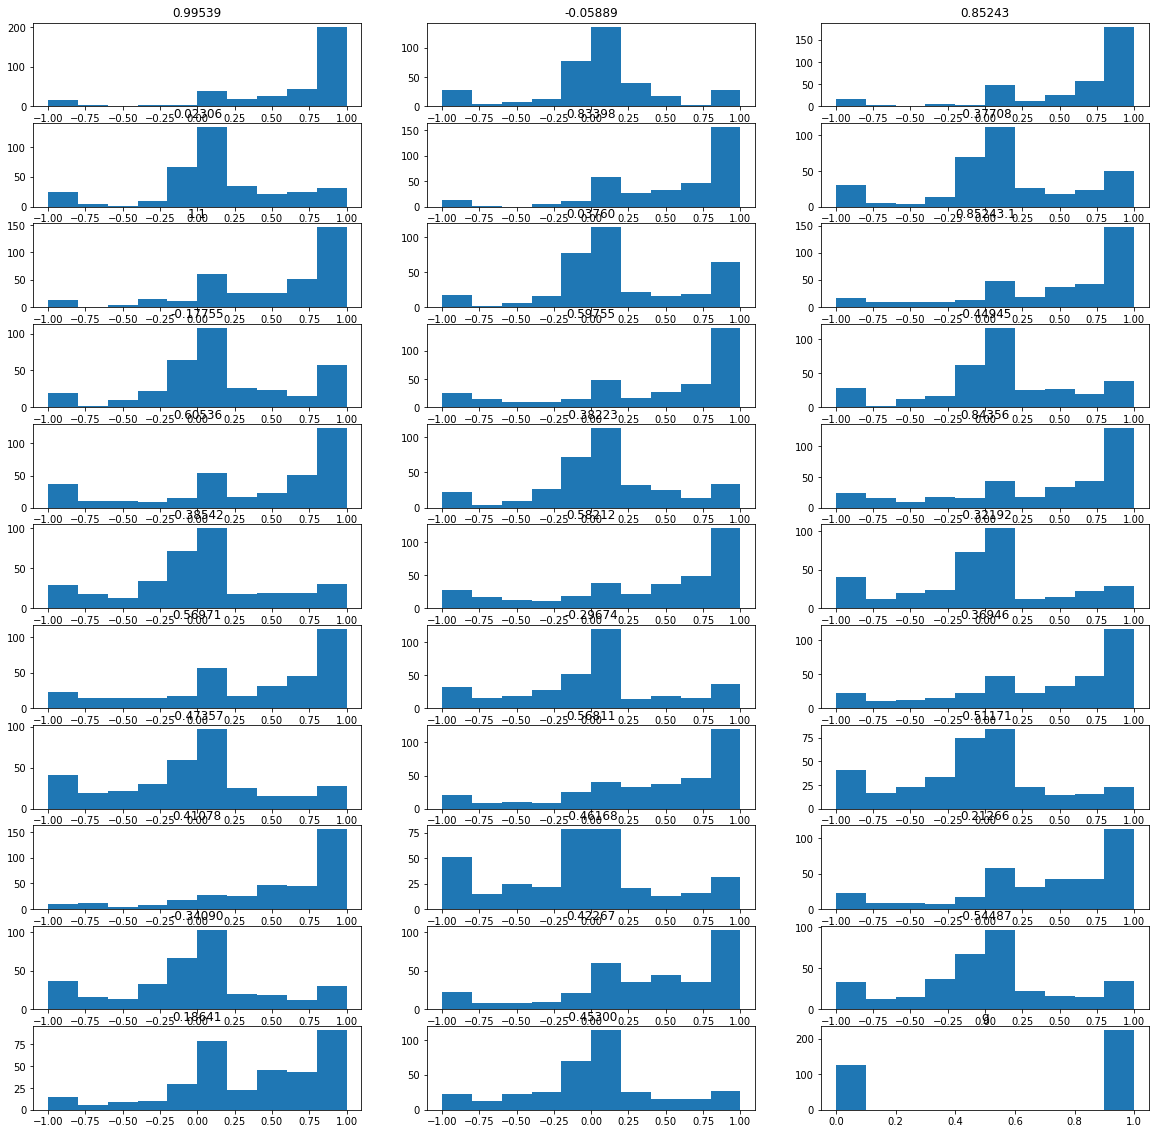

In [69]:
m = 11
n = 3
columns = iter(df.columns)

fig, axes = plt.subplots(m, n, figsize=(20,20))
for i in range(m):
    for j in range(n):
        col = next(columns)
        axes[i, j].hist(df[col])
        axes[i, j].set_title(col)
 

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X = df[df.columns.difference(['g'])].values
y = df['g'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
ss = StandardScaler()
ss.fit(X_train)
xTransf_trn = ss.transform(X_train)
xTransf_tst = ss.transform(X_test)


## 1. Classification baseline

Using Logistic Regression of sklearn, run a grid search on parameter C from the values [0.01, 0.1, 1., 10, 100]. Select the best model by running 5 Fold cross validation on train set according to f1 score.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

options = [0.01, 0.1, 1., 10, 100]
clf = LogisticRegression(solver='lbfgs')
grid_values = {'penalty': ['l2'],'C':options}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1', cv=5)
grid_clf_acc.fit(xTransf_trn, y_train)
yhat_grid = grid_clf_acc.predict(xTransf_tst)
C_best = grid_clf_acc.best_params_['C']
C_best

/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.1

## 2. Dimensionality Reduction PCA

1. Project data to dimension $K_1$ so that total explained variance ratio is $\geq$0.9
2. Project data to dimension $K_2$ so that total explained variance ratio is $\geq$0.99
3. Train Logistic Regression with the best C from task $\bf 1$ on projected data that you got in $\bf 2.1$ and $\bf 2.2$
4. Compare Jaccard Index and F1 score of the three models.
5. Investigate the learned coefficients of best model that you found in $\bf 1$, make two training sets by selecting $K_1$, $K_2$ most important features.
6. Train Logistic Regression with the best C from task $\bf 1$ on datasets that you made in $\bf 2.5$, and compare Jaccard Index and F1 score with respective models from $\bf 2.3$

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from math import floor, ceil

pca = PCA(n_components=0.99, svd_solver='full')
pca.fit(xTransf_trn)
X_transformed = pca.fit_transform(xTransf_trn)
print(f"Number of components {pca.components_.shape}")
print(f"explained_variance_ratio_ { pca.explained_variance_ratio_.cumsum()}")

Number of components (29, 32)
explained_variance_ratio_ [0.28507495 0.41432076 0.49476913 0.56713246 0.6290915  0.66419977
 0.69733087 0.72606966 0.75286777 0.77668428 0.79742613 0.81712297
 0.83550945 0.85242015 0.86843498 0.88341704 0.897284   0.91046937
 0.92233212 0.93287886 0.94327419 0.95213985 0.96009896 0.96699665
 0.97307202 0.97852052 0.98351407 0.98828213 0.99247225]


#### 1. Project data to dimension  𝐾1  so that total explained variance ratio is  ≥ 0.9

In [24]:
# >= 0.9
n_components_09 = 18

pca_09 = PCA(n_components=n_components_09)
pca_09.fit(xTransf_trn)
X_transformed_trn_09 = pca_09.fit_transform(xTransf_trn)
X_transformed_tst_09 = pca_09.fit_transform(xTransf_tst)
print(f"explained_variance_ratio_ { pca_09.explained_variance_ratio_.cumsum()}")

explained_variance_ratio_ [0.25755521 0.41326718 0.50953882 0.58616052 0.657419   0.71039684
 0.75582709 0.79752877 0.83413885 0.86368307 0.88718831 0.90736125
 0.92405451 0.93742741 0.95009989 0.96175777 0.96972948 0.9767074 ]


#### 2. Project data to dimension  𝐾2  so that total explained variance ratio is  ≥ 0.99

In [23]:
# >= 0.99
n_components_099 = 29

pca_099 = PCA(n_components=n_components_099)
pca_099.fit(xTransf_trn)
X_transformed_trn_099 = pca_099.fit_transform(xTransf_trn)
X_transformed_tst_099 = pca_099.fit_transform(xTransf_tst)
print(f"explained_variance_ratio_ { pca_099.explained_variance_ratio_.cumsum()}")

explained_variance_ratio_ [0.25755521 0.41326718 0.50953882 0.58616052 0.657419   0.71039684
 0.75582709 0.79752877 0.83413885 0.86368307 0.88718831 0.90736125
 0.92405451 0.93742741 0.95009989 0.96175777 0.96972948 0.9767074
 0.98252196 0.9876975  0.99143644 0.99347416 0.99504424 0.9964061
 0.99749116 0.99827219 0.99889815 0.99932414 0.99960565]


#### 3. Train Logistic Regression with the best C from task 1 on projected data that you got in 2.1 and  2.2

In [10]:
LR_09 = LogisticRegression(C=C_best, solver='liblinear').fit(X_transformed_trn_09,y_train)
yhat_09 = LR_09.predict(X_transformed_tst_09)

LR_099 = LogisticRegression(C=C_best, solver='liblinear').fit(X_transformed_trn_099,y_train)
yhat_099 = LR_099.predict(X_transformed_tst_099)

#### 4. Compare Jaccard Index and F1 score of the three models.

In [11]:
#Jacard index

from sklearn.metrics import jaccard_score
print(f"Jacard index for PCA >= 0.9 is -> {jaccard_score(y_test, yhat_09)}")
print(f"Jacard index for PCA >= 0.99 is -> {jaccard_score(y_test, yhat_099)}")
print(f"Jacard index without PCA is -> {jaccard_score(y_test, yhat_grid)}")

Jacard index for PCA >= 0.9 is -> 0.8076923076923077
Jacard index for PCA >= 0.99 is -> 0.8076923076923077
Jacard index without PCA is -> 0.86


In [12]:
#F1 score

from sklearn.metrics import f1_score
print(f"F1 score for PCA >= 0.9 is -> {f1_score(y_test, yhat_09)}")
print(f"F1 score for PCA >= 0.99 is -> {f1_score(y_test, yhat_099)}")
print(f"F1 score without PCA is -> {f1_score(y_test, yhat_grid)}")

F1 score for PCA >= 0.9 is -> 0.8936170212765957
F1 score for PCA >= 0.99 is -> 0.8936170212765957
F1 score without PCA is -> 0.924731182795699


#### 5. Investigate the learned coefficients of best model that you found in  1 , make two training sets by selecting  𝐾1 ,  𝐾2  most important features.

In [13]:
coef = grid_clf_acc.best_estimator_.coef_[0]
coef_sorted_args = np.abs(coef).argsort()[::-1]

important_features_099 = coef_sorted_args[:n_components_099]
important_features_09 = coef_sorted_args[:n_components_09]
print(coef.shape)
print(important_features_09.shape)
print(important_features_099.shape)

xTransf_trn_with_099_features = xTransf_trn[:, important_features_099]
xTransf_trn_with_09_features = xTransf_trn[:, important_features_09]
print(xTransf_trn_with_099_features.shape)

xTransf_tst_with_099_features = xTransf_tst[:, important_features_099]
xTransf_tst_with_09_features = xTransf_tst[:, important_features_09]

(32,)
(18,)
(29,)
(280, 29)


#### 6. Train Logistic Regression with the best C from task  1  on datasets that you made in  2.5 , and compare Jaccard Index and F1 score with respective models from  2.3

In [14]:
LR_09_features = LogisticRegression(C=C_best, solver='liblinear').fit(xTransf_trn_with_09_features,y_train)
yhat_09 = LR_09.predict(xTransf_tst_with_09_features)

LR_099_features = LogisticRegression(C=C_best, solver='liblinear').fit(xTransf_trn_with_099_features,y_train)
yhat_099 = LR_099.predict(xTransf_tst_with_099_features)

In [15]:
# #Jacard index

print(f"Jacard index for >=0.9 is -> {jaccard_score(y_test, yhat_09)}")
print(f"Jacard index for >=0.99 is -> {jaccard_score(y_test, yhat_099)}")

Jacard index for >=0.9 is -> 0.42424242424242425
Jacard index for >=0.99 is -> 0.53125


In [16]:
#F1 score

print(f"F1 score for >=0.9 is -> {f1_score(y_test, yhat_09)}")
print(f"F1 score for >=0.99 is -> {f1_score(y_test, yhat_099)}")

F1 score for >=0.9 is -> 0.5957446808510638
F1 score for >=0.99 is -> 0.6938775510204082


## 3. Dimensionality Reduction LDA

1. Project data to dimension $K_1$ so that total explained variance ratio is $\geq$0.9
2. Project data to dimension $K_2$ so that total explained variance ratio is $\geq$0.99
3. Train Logistic Regression with the best C from task $\bf 1$ on projected data that you got in $\bf 3.1$ and $\bf 3.2$
4. Compare Jaccard Index and F1 score with the previous models in tasks $\bf 1$ and $\bf 2$.
5. Investigate the learned coefficients of best model that you found in $\bf 1$, make two training sets by selecting $K_1$, $K_2$ most important features.
6. Train Logistic Regression with the best C from task $\bf 1$ on datasets that you made in $\bf 3.5$, and compare Jaccard Index and F1 score with respective models from $\bf 3.3$

In [85]:
from lda import LDA

lda = LDA(3)
lda.fit(X_train, y_train)
x_lda_trans_train = lda.transform(X_train)
x_lda_trans_test = lda.transform(X_test)

S_w, S_b = lda.compute_scatters(X_train, y_train)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0}: {1}'.format(i+1, (j[0]/eigv_sum).real))

eigenvalue 1: 0.9999999999999999
eigenvalue 2: 1.284995938192628e-16
eigenvalue 3: 9.804744877887787e-17
eigenvalue 4: 9.804744877887787e-17
eigenvalue 5: 8.256847111032982e-17
eigenvalue 6: 8.256847111032982e-17
eigenvalue 7: 7.127030286378945e-17
eigenvalue 8: 6.96078437173958e-17
eigenvalue 9: 6.96078437173958e-17
eigenvalue 10: 6.558804094358705e-17
eigenvalue 11: 6.558804094358705e-17
eigenvalue 12: 5.72055976074174e-17
eigenvalue 13: 5.72055976074174e-17
eigenvalue 14: 5.4848209535232874e-17
eigenvalue 15: 2.7884435192524504e-17
eigenvalue 16: 2.7884435192524504e-17
eigenvalue 17: 2.6202416527599045e-17
eigenvalue 18: 2.6202416527599045e-17
eigenvalue 19: 2.0162965776924463e-17
eigenvalue 20: 2.0162965776924463e-17
eigenvalue 21: 1.8201634943054208e-17
eigenvalue 22: 1.8201634943054208e-17
eigenvalue 23: 1.71401934076394e-17
eigenvalue 24: 1.3286305512124696e-17
eigenvalue 25: 1.0559528308618151e-17
eigenvalue 26: 8.375038043247355e-18
eigenvalue 27: 8.375038043247355e-18
eigenva

#### Train Logistic Regression with the best C from task  1  on projected data that you got in  3.1  and  3.2

In [88]:
LR_lda = LogisticRegression(C=C_best, solver='liblinear').fit(x_lda_trans_train, y_train)
# yhat_lda = LR_lda.predict(x_lda_trans_test)

ValueError: Complex data not supported
[[ 7.43615153e-01+0.j         -6.41946932e-01+0.j
  -1.38121012e-01-0.10343902j]
 [ 4.17838419e-01+0.j         -6.76381631e-01+0.j
   6.32052858e-02-0.06703834j]
 [ 2.40519789e-01+0.j         -1.01926050e+00+0.j
  -3.76025311e-01+0.00657956j]
 [ 7.35626062e-01+0.j         -6.64683361e-01+0.j
  -7.47573914e-02-0.26421335j]
 [ 2.89473665e-02+0.j         -5.63976425e-01+0.j
  -2.44714333e-01-0.11913187j]
 [ 2.87922628e-01+0.j          1.48740722e-02+0.j
   4.04466921e-02-0.02295679j]
 [ 7.49630002e-01+0.j         -2.80708162e-01+0.j
   1.69169606e-01-0.01796133j]
 [ 3.03747748e-01+0.j         -2.99967106e-01+0.j
  -4.38217800e-02-0.05080277j]
 [ 7.70621735e-01+0.j         -6.18857369e-01+0.j
  -2.75646148e-01-0.00428526j]
 [-4.01363330e-01+0.j         -7.60576445e-01+0.j
   5.91255033e-01-0.24057137j]
 [ 2.60337331e-01+0.j         -1.12080494e+00+0.j
  -1.48968902e-01-0.39609027j]
 [ 3.33413695e-01+0.j         -4.98579044e-01+0.j
  -7.91739225e-02-0.12505324j]
 [ 4.53637505e-01+0.j         -6.00149440e-01+0.j
   2.31567952e-02-0.23227318j]
 [ 6.56401788e-01+0.j         -6.12859692e-01+0.j
  -2.52743324e-01-0.06546136j]
 [ 7.65743742e-01+0.j         -1.67574989e-02+0.j
   3.81719856e-01-0.39802409j]
 [ 4.17264550e-01+0.j         -8.89509610e-02+0.j
   3.49813100e-01+0.01829565j]
 [ 8.37378402e-01+0.j         -2.03251420e-01+0.j
   4.57695773e-01-0.47160949j]
 [ 7.41031239e-01+0.j         -6.61791844e-01+0.j
  -1.09534402e-01-0.14089661j]
 [ 4.36819020e-01+0.j         -1.44677712e-01+0.j
   1.35273154e-01-0.14465707j]
 [ 4.83598661e-01+0.j         -1.76800795e-01+0.j
  -2.27649706e-01-0.52362393j]
 [ 6.13791557e-01+0.j         -5.59147395e-01+0.j
  -6.70057327e-02-0.11852957j]
 [ 7.55678161e-01+0.j         -9.89678013e-02+0.j
   3.78945854e-01-0.48854598j]
 [ 2.97257740e-01+0.j         -5.24229001e-02+0.j
  -1.01198944e-01+0.09631107j]
 [ 7.50503502e-01+0.j         -6.14173926e-01+0.j
  -9.28448529e-02-0.08549955j]
 [ 7.72895781e-01+0.j         -5.66829691e-02+0.j
   5.07530836e-01-0.1743945j ]
 [ 7.81287278e-01+0.j         -4.35334638e-01+0.j
   5.29528442e-02-0.06549975j]
 [ 5.93533757e-01+0.j         -5.77700811e-01+0.j
   8.25736906e-01+0.29589428j]
 [ 7.65616707e-01+0.j         -6.88663153e-01+0.j
  -1.23683311e-01-0.14459541j]
 [ 8.17443909e-01+0.j          5.01161316e-02+0.j
   5.02814676e-01+0.01054169j]
 [ 9.80190694e-01+0.j         -6.32283255e-01+0.j
   8.42657447e-02-0.06786711j]
 [ 6.46418516e-01+0.j          1.68131955e-02+0.j
   2.85574098e-01-0.14686501j]
 [-3.73933234e-01+0.j         -2.28587608e-01+0.j
  -8.33182752e-01-0.06372847j]
 [ 6.87462575e-01+0.j         -1.95531959e-02+0.j
   1.10749670e-01-0.00390732j]
 [ 7.11029615e-01+0.j         -8.25752346e-01+0.j
  -2.45831324e-01-0.11356013j]
 [ 4.61186049e-01+0.j          2.34094022e-01+0.j
  -2.42766983e-01+0.17066534j]
 [ 1.70402347e-01+0.j         -9.06141086e-01+0.j
   8.44729722e-02-0.26740142j]
 [-1.61979484e-01+0.j          5.16951699e-01+0.j
  -3.82068882e-01+0.02411232j]
 [ 7.46319622e-01+0.j         -5.60882650e-02+0.j
   4.02863432e-01-0.41179521j]
 [-3.37205204e-02+0.j         -1.72192904e-01+0.j
  -1.07596066e-01-0.09550293j]
 [ 6.68949731e-01+0.j         -5.29712190e-01+0.j
  -2.87191837e-02-0.10190999j]
 [ 7.91092827e-01+0.j         -4.66551566e-01+0.j
   7.78346390e-03-0.10921978j]
 [ 5.53509209e-01+0.j         -1.61266747e-02+0.j
   3.61605902e-01-0.45954906j]
 [ 6.32398690e-01+0.j         -4.97881832e-01+0.j
  -5.77416324e-02-0.10689009j]
 [-9.43889369e-02+0.j         -5.06350335e-01+0.j
   3.14269268e-01-0.69207286j]
 [-3.23093579e-02+0.j          5.37613865e-01+0.j
  -3.40476294e-01+0.33507514j]
 [ 2.01328164e-01+0.j         -4.11926663e-01+0.j
  -5.25423175e-01+0.38220856j]
 [ 7.32759975e-01+0.j         -8.06809167e-02+0.j
   3.49072122e-01+0.03265053j]
 [-3.12890480e-01+0.j         -4.03888793e-01+0.j
   2.52169637e-01-0.03291968j]
 [ 8.24180731e-01+0.j         -3.84380760e-01+0.j
   1.33061437e-01-0.02133789j]
 [-9.83421351e-03+0.j         -1.88441395e+00+0.j
   6.86905643e-02-0.14226169j]
 [ 7.42933738e-01+0.j         -1.52165899e-01+0.j
   2.31702678e-01+0.02528993j]
 [ 4.09656821e-01+0.j         -2.73826282e-01+0.j
   4.15302546e-02-0.29331145j]
 [ 8.40925942e-01+0.j         -7.09402545e-01+0.j
  -8.33492816e-01-0.23708245j]
 [ 7.70595607e-02+0.j         -1.49752993e+00+0.j
   2.65177250e-01-0.70817726j]
 [ 4.74592606e-01+0.j         -4.58303246e-01+0.j
   7.57353812e-02-0.10939604j]
 [ 7.17673199e-01+0.j         -6.58791006e-01+0.j
  -9.55160371e-02-0.13613813j]
 [ 4.13804373e-01+0.j         -3.16393232e-01+0.j
  -5.54397964e-02-0.10111311j]
 [ 4.82833986e-01+0.j         -8.37006248e-01+0.j
   6.54916386e-01-0.23186667j]
 [ 2.32877842e-01+0.j         -4.32906386e-01+0.j
  -1.48654803e-02+0.0012973j ]
 [ 3.94312033e-01+0.j         -5.94520613e-01+0.j
   1.63069307e-02-0.22338145j]
 [ 7.60915714e-01+0.j          5.70501358e-02+0.j
   4.20401675e-01+0.05270162j]
 [-4.72916949e-02+0.j         -6.53325929e-01+0.j
  -4.16155093e-01-0.02252347j]
 [-1.73912899e-01+0.j          1.32914624e-02+0.j
   1.34531848e+00-0.14426679j]
 [ 7.66399939e-01+0.j         -6.37952835e-01+0.j
  -1.14202275e-01-0.09553128j]
 [ 7.85225372e-01+0.j         -1.30060700e-01+0.j
   4.87865861e-01-0.36386913j]
 [ 8.14214458e-01+0.j         -4.93341561e-03+0.j
   6.53543396e-01-0.12933501j]
 [ 6.38830831e-01+0.j         -3.79062934e-01+0.j
  -1.79741749e-01+0.13826288j]
 [ 5.93282172e-01+0.j         -6.54724037e-01+0.j
  -2.65601811e-01-0.08503787j]
 [ 5.48387950e-01+0.j         -6.49083020e-01+0.j
  -3.13768360e-02-0.14990563j]
 [ 6.41725239e-01+0.j         -5.51168174e-01+0.j
   7.76899396e-02-0.3193507j ]
 [ 5.34867908e-01+0.j         -3.60630697e-01+0.j
  -1.46914167e-01+0.11172834j]
 [ 5.45581091e-01+0.j         -4.77293225e-01+0.j
  -1.21332033e-01-0.03781113j]
 [ 5.75511290e-01+0.j         -1.64359791e-01+0.j
   2.14820560e-01-0.06326396j]
 [-3.81937560e-01+0.j         -7.32909575e-01+0.j
   1.35888552e-01-0.14091535j]
 [-4.20860557e-01+0.j         -6.14199402e-01+0.j
  -4.99076886e-01-0.31415302j]
 [ 6.45289917e-01+0.j         -6.15634060e-01+0.j
  -1.05717984e-01-0.16237234j]
 [ 3.73533638e-01+0.j          8.25464465e-01+0.j
  -2.18090311e-02-0.06474984j]
 [ 3.53214021e-01+0.j         -2.19001694e-01+0.j
  -1.08567965e-01-0.11933329j]
 [ 7.16564137e-01+0.j         -6.19721371e-01+0.j
  -1.11767890e-01-0.19373414j]
 [-3.27533906e-01+0.j         -4.94509984e-01+0.j
   1.97374308e-02-0.14464811j]
 [ 7.73865828e-01+0.j         -6.97789291e-01+0.j
  -1.32649502e-01-0.14208739j]
 [-7.76723181e-01+0.j         -1.45660477e+00+0.j
  -8.67671140e-01-0.30408198j]
 [ 6.62968382e-01+0.j         -5.82453429e-01+0.j
  -3.65278834e-02-0.07759542j]
 [ 7.60047140e-01+0.j         -1.28527710e-01+0.j
   4.07975213e-01-0.42820768j]
 [ 6.93460885e-01+0.j         -6.69606495e-01+0.j
  -2.36294134e-01-0.17334001j]
 [ 6.87439692e-01+0.j          9.42400025e-02+0.j
   4.61783371e-01+0.02602164j]
 [ 1.66257120e-02+0.j          1.55042107e-02+0.j
   1.57843572e-02+0.01190024j]
 [ 7.18243436e-01+0.j         -6.30372940e-01+0.j
  -1.34207690e-01-0.1109866j ]
 [ 7.38869708e-01+0.j          5.96174122e-01+0.j
   1.20523609e-01-0.13767548j]
 [ 4.37057459e-01+0.j         -4.67117991e-02+0.j
   2.93868028e-01-0.16669755j]
 [ 6.87280171e-01+0.j         -2.28580068e-01+0.j
   1.92640788e-01-0.00721669j]
 [ 3.91396869e-01+0.j          9.04357263e-06+0.j
   4.93243994e-03+0.00113028j]
 [ 7.13452302e-01+0.j         -4.90255346e-01+0.j
  -1.75268794e-01-0.0623496j ]
 [ 7.43065027e-01+0.j         -6.93134901e-01+0.j
  -1.12534078e-01-0.16728801j]
 [ 6.85832731e-01+0.j         -6.14665834e-01+0.j
  -1.30836271e-01-0.12782423j]
 [ 4.81512760e-01+0.j         -4.25439687e-01+0.j
  -1.22595223e-01-0.0610775j ]
 [ 2.65321059e-01+0.j         -4.84195867e-01+0.j
  -1.14674977e-01-0.32072012j]
 [ 3.07577371e-01+0.j         -6.27028989e-01+0.j
  -2.90325598e-01-0.37482015j]
 [ 6.90410401e-01+0.j         -4.90370986e-01+0.j
  -3.58002297e-01-0.05551028j]
 [ 7.32678688e-01+0.j         -4.16355897e-01+0.j
   9.94819705e-02-0.05244835j]
 [-4.97414135e-02+0.j          1.40345741e-02+0.j
  -5.16958267e-02-0.05716003j]
 [ 1.01889540e-02+0.j         -1.08582249e-01+0.j
   2.64710700e-01-0.18790155j]
 [ 8.07186119e-01+0.j          1.27343463e-01+0.j
   5.07833583e-01-0.04209859j]
 [ 8.77498033e-01+0.j          5.49991582e-01+0.j
   2.39526401e-01-0.18084587j]
 [ 1.07854740e+00+0.j         -5.52121762e-01+0.j
  -1.55786554e-01-0.17394978j]
 [-3.07989448e-01+0.j         -4.70574732e-01+0.j
   1.12823005e+00-0.19341787j]
 [ 7.17933298e-01+0.j         -2.62957389e-01+0.j
   2.09946179e-01-0.02311175j]
 [-5.48575725e-02+0.j         -6.79085886e-01+0.j
   5.00387727e-01-0.40318179j]
 [ 6.20091686e-01+0.j         -7.99500559e-01+0.j
  -1.41514942e-01-0.06819445j]
 [ 7.95937194e-01+0.j         -2.83123299e-01+0.j
  -1.62703202e-01-0.0614938j ]
 [ 4.19619101e-01+0.j         -4.75689085e-01+0.j
   1.15768470e+00-0.09975471j]
 [ 3.13817896e-01+0.j         -5.67645335e-01+0.j
  -5.04507427e-02-0.0872617j ]
 [ 4.12694891e-01+0.j         -9.51711580e-01+0.j
  -8.61965022e-03+0.06420794j]
 [ 7.59715664e-01+0.j         -5.01471698e-01+0.j
  -1.16234807e-01-0.13523996j]
 [ 7.70194863e-01+0.j         -6.26631630e-02+0.j
   4.21285101e-01-0.35772347j]
 [ 5.24545059e-01+0.j         -5.11162110e-01+0.j
  -1.94383372e-02-0.15793064j]
 [ 6.84964828e-01+0.j         -6.54585871e-01+0.j
  -6.07167653e-02-0.13298076j]
 [ 6.94094701e-01+0.j         -4.10579469e-01+0.j
   4.04706590e-02+0.08042558j]
 [ 6.49850501e-01+0.j         -5.12504789e-01+0.j
   4.52648584e-03-0.15837532j]
 [ 8.39891188e-01+0.j         -1.41676945e-02+0.j
   4.83503185e-01-0.18954667j]
 [-2.23205588e-01+0.j         -1.69540694e+00+0.j
  -1.73888646e-02-0.52063305j]
 [-4.12134159e-01+0.j          8.86009103e-03+0.j
  -5.13115410e-01-0.01712571j]
 [ 5.60243184e-01+0.j         -5.84632333e-01+0.j
  -2.73007241e-01+0.03196116j]
 [ 7.47991808e-01+0.j         -6.15816110e-01+0.j
  -5.86059299e-02-0.15471383j]
 [ 1.77832062e-01+0.j          4.85011587e-01+0.j
   3.86237010e-01+0.12016287j]
 [ 4.31482361e-01+0.j         -3.56865908e-01+0.j
  -3.41349060e-01-0.09792671j]
 [ 7.02909008e-01+0.j         -7.40005557e-01+0.j
   1.33720714e-01-0.15225337j]
 [ 2.51544235e-01+0.j         -1.90346772e-01+0.j
  -2.56570089e-01-0.22117493j]
 [ 9.79822066e-01+0.j         -5.63391066e-03+0.j
   3.84623080e-01-0.12127514j]
 [ 2.93162716e-01+0.j         -2.41680359e-01+0.j
  -3.61385691e-01+0.77986271j]
 [ 4.75829455e-01+0.j         -8.97513022e-01+0.j
  -7.92283672e-01+0.01484314j]
 [ 1.01151599e+00+0.j         -3.43134536e-01+0.j
   4.80746612e-01-0.49649284j]
 [ 7.51237168e-01+0.j         -4.62882184e-01+0.j
   1.52558059e-02-0.08956607j]
 [ 4.01802675e-01+0.j         -4.64470899e-01+0.j
   2.22027458e-01-0.31898739j]
 [ 5.06584283e-01+0.j         -1.68370302e-01+0.j
   1.64415625e-01-0.15014917j]
 [ 7.63031416e-01+0.j         -6.97488799e-01+0.j
  -1.21066785e-01-0.14433057j]
 [ 7.58747255e-01+0.j         -6.90757608e-01+0.j
  -1.02779133e-01-0.15096817j]
 [ 7.71494350e-02+0.j         -6.67613612e-01+0.j
   9.47860305e-03-0.12621684j]
 [ 6.89657259e-01+0.j         -5.23216521e-01+0.j
  -1.48591936e-01+0.08001781j]
 [ 6.02266929e-01+0.j         -5.96587303e-01+0.j
  -2.39533401e-02-0.07867781j]
 [ 5.64149924e-01+0.j         -9.72788958e-01+0.j
  -4.39792362e-01-0.36984386j]
 [-2.28913724e-01+0.j         -3.66253642e-01+0.j
   1.40553037e-01+0.14502583j]
 [ 8.19678380e-01+0.j          2.68387362e-02+0.j
   4.85075754e-01-0.07163762j]
 [ 2.94558919e-01+0.j         -6.62941885e-01+0.j
   2.88540695e-02+0.12018621j]
 [-3.41816915e-01+0.j         -3.83406542e-01+0.j
   1.21895833e-01-0.20573297j]
 [ 2.69314267e-01+0.j          7.02169199e-01+0.j
   3.50018524e-01+0.05021182j]
 [ 7.61022594e-02+0.j         -1.66866936e-01+0.j
  -4.53944246e-01+0.17146757j]
 [ 7.81060390e-01+0.j         -6.20323691e-01+0.j
  -1.26814704e-01-0.11932046j]
 [-1.23799432e-01+0.j          1.63301623e-02+0.j
   1.94449005e-01+0.01819289j]
 [ 2.67518733e-01+0.j         -4.36622577e-02+0.j
  -5.02136400e-03-0.06534403j]
 [ 8.29806786e-01+0.j         -5.31144268e-02+0.j
   5.45717339e-01-0.26850558j]
 [ 4.79380309e-01+0.j         -4.04607777e-01+0.j
   1.93368887e-03+0.01226859j]
 [ 7.47872181e-01+0.j          1.73521926e-01+0.j
   2.90789261e-01-0.33784599j]
 [ 1.15065678e-01+0.j         -8.96705231e-01+0.j
   5.21258021e-01-0.44176243j]
 [ 9.50075787e-02+0.j         -8.85445527e-01+0.j
   1.33504423e-02-0.04445772j]
 [ 6.29584731e-01+0.j         -2.81214773e-01+0.j
   1.73066136e-02+0.02139928j]
 [ 7.80931781e-01+0.j         -8.90885107e-02+0.j
   5.80921527e-01-0.11563667j]
 [-6.70476689e-01+0.j         -5.89660218e-01+0.j
   3.38795695e-01-0.42130455j]
 [-5.37273556e-02+0.j          3.98444268e-02+0.j
   6.61293505e-03+0.08337816j]
 [ 5.47783373e-01+0.j         -6.31447986e-01+0.j
  -1.59992664e-01-0.15828704j]
 [ 7.61088055e-01+0.j         -6.01462915e-01+0.j
  -3.79635083e-02-0.11231904j]
 [ 3.89918159e-01+0.j         -3.37809621e-01+0.j
  -1.32620361e-01+0.16512281j]
 [ 6.55185430e-01+0.j         -4.33283261e-01+0.j
  -1.21214336e-01-0.17820027j]
 [ 6.42734938e-01+0.j         -1.01100846e+00+0.j
   8.93799954e-01-0.04731852j]
 [ 7.16221562e-01+0.j          1.48426915e-02+0.j
   3.99851032e-01+0.01333447j]
 [ 6.15013396e-01+0.j         -3.31889607e-01+0.j
  -2.68285409e-01-0.07194678j]
 [ 6.34050878e-01+0.j         -7.19169757e-01+0.j
  -1.59083329e-01-0.12636136j]
 [-6.25436299e-01+0.j          1.66342108e-01+0.j
   3.46645412e-02-0.21518292j]
 [ 8.03673247e-01+0.j         -6.73459108e-01+0.j
  -4.05023136e-02-0.13892321j]
 [ 7.13481307e-01+0.j         -6.12110619e-01+0.j
  -1.17516073e-01-0.1221267j ]
 [ 5.82981388e-02+0.j         -1.78574626e-01+0.j
   1.95600052e-01-0.12716246j]
 [-4.48374978e-01+0.j          7.02377433e-02+0.j
  -1.82485206e-01-0.0850232j ]
 [-2.56438719e-01+0.j         -4.73441745e-01+0.j
   9.97913416e-03-0.2270418j ]
 [-2.29668704e-01+0.j         -3.74024167e-01+0.j
   1.03051293e+00+0.45480726j]
 [ 2.95186774e-01+0.j         -4.79197896e-01+0.j
  -4.00367363e-02-0.12436237j]
 [ 7.43023598e-01+0.j         -7.26774664e-01+0.j
  -1.37773925e-01-0.13508137j]
 [-4.15508557e-01+0.j         -9.10683863e-01+0.j
   1.76675054e-01-0.35618096j]
 [-3.42258485e-01+0.j          8.63360886e-02+0.j
   3.32672254e-01-0.48010443j]
 [ 5.02616321e-01+0.j         -4.82174674e-01+0.j
   9.54536618e-02-0.10319906j]
 [ 1.88705305e-01+0.j          5.28198573e-02+0.j
   1.84325006e-01-0.1423048j ]
 [ 3.35834818e-01+0.j         -7.95443376e-02+0.j
   1.20949954e-01-0.03106143j]
 [ 4.27982275e-01+0.j         -4.61904312e-01+0.j
  -2.41851887e-02-0.14923434j]
 [-2.56438719e-01+0.j         -4.73441745e-01+0.j
   9.97913416e-03-0.2270418j ]
 [-3.39014106e-01+0.j         -6.69434391e-01+0.j
  -6.82799888e-01-0.30546889j]
 [ 7.17036159e-01+0.j         -3.96824466e-01+0.j
  -4.15182978e-02-0.07823089j]
 [ 7.79814094e-01+0.j         -6.82716563e-01+0.j
  -1.16415494e-01-0.14948242j]
 [ 7.01164053e-01+0.j         -8.64707285e-01+0.j
   9.29454236e-02-0.13689909j]
 [ 7.59045457e-01+0.j         -2.94579277e-01+0.j
   1.82280403e-01-0.05736163j]
 [ 7.10070932e-01+0.j         -6.69490504e-01+0.j
  -1.00495875e-01-0.13226643j]
 [ 7.54674618e-01+0.j         -6.85017644e-01+0.j
  -1.67055346e-01-0.07854638j]
 [-1.86874925e-01+0.j         -8.25619812e-01+0.j
   1.42891192e+00-0.34601617j]
 [ 7.99916106e-01+0.j         -3.14817590e-01+0.j
   1.47389278e-01-0.04874507j]
 [-1.26906355e-01+0.j         -1.02877798e+00+0.j
  -4.89957877e-01-0.26460101j]
 [ 7.20655280e-02+0.j          3.27048206e-01+0.j
   9.40773958e-01-0.657521j  ]
 [ 7.61385581e-01+0.j         -6.90896536e-01+0.j
  -1.08827980e-01-0.15314076j]
 [ 2.47592138e-01+0.j         -9.41001983e-01+0.j
  -2.78870455e-01-0.14376168j]
 [ 8.35714207e-01+0.j         -1.85011718e-01+0.j
   4.69167792e-01-0.41431804j]
 [ 2.74558695e-01+0.j          2.70647955e-01+0.j
   5.83727006e-01+0.02421034j]
 [-6.36433151e-01+0.j          2.96513288e-01+0.j
   3.75085670e-01-0.38614715j]
 [ 4.46668813e-01+0.j         -2.36809924e-01+0.j
  -4.75810398e-02-0.08760789j]
 [ 1.11593798e-01+0.j         -4.15648544e-01+0.j
  -2.29239003e-02-0.04055984j]
 [ 7.64859210e-01+0.j         -1.01609106e-02+0.j
   3.53633118e-01-0.37525906j]
 [ 2.40479341e-01+0.j          4.96274618e-01+0.j
   1.19446521e-01+0.09908195j]
 [ 7.19629564e-01+0.j         -1.31324018e-02+0.j
   3.51341877e-01+0.06841556j]
 [ 6.15029805e-01+0.j         -5.76546458e-01+0.j
  -3.22016614e-02-0.106555j  ]
 [ 7.27651125e-01+0.j          2.68759174e-04+0.j
   3.75696288e-01-0.49720014j]
 [ 6.71880254e-01+0.j         -4.26040759e-01+0.j
  -2.19761295e-01-0.15508738j]
 [ 8.02576271e-01+0.j          3.98967885e-01+0.j
   1.85625641e-01-0.1747986j ]
 [-4.70891944e-01+0.j          1.40348218e+00+0.j
   7.42756152e-01+0.27856667j]
 [ 7.41992905e-01+0.j          3.71122564e-01+0.j
   2.03673887e-01-0.20353313j]
 [ 4.82676225e-01+0.j         -5.34080968e-01+0.j
  -7.44168745e-02-0.0693686j ]
 [-1.70292104e-01+0.j         -6.97786602e-01+0.j
  -5.89736423e-03-0.30930906j]
 [ 3.65685694e-01+0.j         -5.05375517e-01+0.j
  -1.02548106e-01-0.02842475j]
 [-5.43852453e-02+0.j         -7.92193634e-01+0.j
  -5.60362068e-01-0.2438889j ]
 [ 6.30720281e-01+0.j         -4.71893101e-01+0.j
  -1.45316996e-01-0.10119641j]
 [ 2.46412605e-01+0.j          9.64233564e-02+0.j
  -2.79715985e-02-0.09139498j]
 [ 7.29074482e-01+0.j         -5.11050127e-01+0.j
   2.38026096e-02-0.04229119j]
 [ 7.67323412e-01+0.j         -5.08268025e-02+0.j
   3.93423174e-01-0.43593954j]
 [ 9.30935221e-01+0.j         -7.17587162e-01+0.j
  -4.05874715e-01-0.19470384j]
 [ 5.08136509e-01+0.j         -5.75680340e-01+0.j
  -8.83344260e-02-0.15939903j]
 [-4.01704633e-01+0.j         -6.04795690e-01+0.j
   4.42713564e-01-0.40678856j]
 [ 5.19383513e-01+0.j         -5.88232611e-01+0.j
  -4.20530379e-02-0.00626148j]
 [ 5.01797826e-01+0.j         -2.15473167e-01+0.j
  -1.68794940e-01-0.04847285j]
 [ 7.82801087e-01+0.j         -5.17027659e-01+0.j
  -3.98753207e-02-0.08739475j]
 [ 5.72524565e-01+0.j         -5.14092641e-01+0.j
   4.06163428e-02-0.14623396j]
 [ 7.44362119e-01+0.j         -4.67555612e-02+0.j
   3.76015576e-01-0.50409328j]
 [-5.02074227e-01+0.j         -4.97042791e-01+0.j
  -2.69013767e-01-0.58010079j]
 [-1.55805441e-02+0.j          1.01281011e-01+0.j
   1.42761026e-02+0.00526201j]
 [ 7.37864319e-01+0.j          3.15762210e-02+0.j
   4.61059851e-01-0.02756174j]
 [-4.14190353e-01+0.j         -1.16899037e-01+0.j
   4.43887821e-01+0.08053503j]
 [-3.17560722e-01+0.j         -1.17719778e-01+0.j
   3.40523984e-01+0.01596099j]
 [ 6.71959798e-01+0.j         -2.42056891e-01+0.j
   1.68375830e-01-0.02650943j]
 [ 3.75218839e-01+0.j          1.19613631e-01+0.j
   2.06968258e-01+0.0660111j ]
 [ 7.26081388e-01+0.j          1.11021724e-01+0.j
   4.61181252e-01+0.03054602j]
 [ 5.35636655e-01+0.j          9.87829821e-02+0.j
  -1.01922815e+00+0.36907649j]
 [ 8.40887363e-01+0.j         -9.85443610e-02+0.j
   4.28206658e-01-0.28673799j]
 [ 5.55806116e-01+0.j          2.89501899e-02+0.j
   3.10767895e-01-0.0260959j ]
 [ 9.10889273e-01+0.j         -2.56747664e-01+0.j
  -2.40144891e-01+0.01588921j]
 [ 5.02448057e-01+0.j         -6.96725769e-01+0.j
  -8.34130788e-01-0.43967204j]
 [ 6.50690123e-01+0.j         -8.83051780e-01+0.j
  -4.62161831e-01+0.09654204j]
 [ 6.35646188e-01+0.j         -4.89757172e-01+0.j
  -3.96994477e-02-0.04464293j]
 [ 6.54376946e-01+0.j         -5.32134825e-01+0.j
  -2.13398100e-01+0.02176988j]
 [ 7.50345012e-01+0.j          3.93461627e-02+0.j
   3.72058608e-01-0.3728266j ]
 [ 7.04351679e-01+0.j         -1.31452321e-01+0.j
   4.03318326e-01-0.35617942j]
 [-6.53162416e-01+0.j         -3.09759582e-01+0.j
  -2.94708470e-02-0.28545919j]
 [-2.81536632e-01+0.j         -3.74598574e-01+0.j
  -4.52783586e-01-0.02204159j]
 [ 7.39453601e-01+0.j         -6.88535627e-01+0.j
  -1.24667317e-01-0.15041924j]
 [ 6.00486600e-01+0.j         -4.18877563e-01+0.j
  -1.57671886e-01+0.03550373j]
 [ 2.33323993e-01+0.j          3.34843795e-01+0.j
  -5.29402913e-01+0.19070229j]
 [ 4.72053055e-01+0.j          3.30003452e-01+0.j
   1.00338779e-01-0.09927304j]
 [ 6.32326323e-02+0.j         -5.68428705e-01+0.j
   8.32072405e-02-0.08298929j]
 [ 7.19438512e-01+0.j         -6.84169496e-01+0.j
  -1.30247208e-01-0.14800656j]
 [ 4.26607783e-01+0.j         -1.05473328e+00+0.j
   5.34245069e-01-0.67475959j]
 [-1.11211965e+00+0.j         -9.86409320e-01+0.j
   1.01974413e+00-0.40608879j]
 [ 7.18357018e-01+0.j         -6.41384470e-01+0.j
  -5.43715060e-02-0.08498597j]
 [ 1.01160763e+00+0.j         -1.89124802e-02+0.j
   9.05538066e-01-0.69368914j]
 [ 4.49696751e-01+0.j         -8.66791510e-01+0.j
  -1.92226568e-01-0.20754135j]
 [ 3.52452261e-01+0.j         -4.96010577e-01+0.j
  -1.31891334e-01+0.04361046j]
 [ 1.02181817e-01+0.j         -4.71726896e-02+0.j
  -5.72084829e-01+0.07351686j]
 [ 7.66251303e-01+0.j          6.14170368e-01+0.j
   1.28521512e-01-0.07498981j]
 [-1.37584834e-01+0.j          5.17870690e-02+0.j
  -8.38673558e-02+0.0496421j ]
 [ 6.81909573e-01+0.j         -6.42974011e-01+0.j
  -5.36339037e-02-0.12533004j]
 [-5.44114858e-02+0.j         -7.99046065e-01+0.j
   6.85757265e-01+0.15426141j]
 [ 4.45166399e-01+0.j         -3.25890382e-01+0.j
  -2.68777256e-01-0.06308726j]
 [ 6.88472233e-01+0.j          4.44204699e-02+0.j
   3.70052971e-01+0.06939794j]
 [ 7.49751890e-01+0.j         -3.81978394e-01+0.j
   1.08975555e-01-0.05251388j]
 [ 4.43689016e-01+0.j         -4.89191847e-01+0.j
  -2.20182398e-01-0.20783187j]
 [ 5.97002041e-01+0.j         -5.32031062e-01+0.j
   1.18359407e-01-0.1838091j ]
 [ 6.82784265e-01+0.j         -6.39166481e-01+0.j
  -2.28779493e-02-0.10652054j]
 [ 1.37148602e-02+0.j          1.14859246e-02+0.j
   3.19071530e-02+0.00476827j]
 [ 7.77339276e-01+0.j         -6.77480749e-01+0.j
  -1.61717326e-01-0.09729127j]
 [ 1.77973454e-01+0.j         -1.94972872e-01+0.j
  -8.87257482e-02-0.02212155j]
 [ 5.70503814e-01+0.j          4.24871298e-01+0.j
   3.51173522e-01-0.12827748j]
 [ 5.41074119e-01+0.j         -3.48413817e-01+0.j
  -5.35589573e-03-0.06614179j]
 [-6.09214988e-01+0.j          7.01191361e-01+0.j
   7.49204955e-01+0.67934757j]
 [ 8.58445436e-01+0.j          6.35349858e-02+0.j
   1.02963295e+00+0.11328263j]
 [ 2.47746790e-02+0.j          8.06542043e-02+0.j
   1.26118106e-02-0.19788111j]
 [ 7.11723652e-01+0.j         -4.83098999e-01+0.j
  -1.87120561e-01+0.08296936j]
 [-1.48997222e-01+0.j          6.03358979e-01+0.j
  -7.81157074e-01+0.0999235j ]
 [ 7.88516650e-01+0.j          5.38761859e-01+0.j
   5.94252077e-01-0.14062617j]]


## 4. 2D plots

Make 4 plots
1. Select 2 most important features of the best Logistic Regression model from task $\bf 1$. Make scatter plot using these two features, and color according to target variable.
2. Select first two principal components from task $\bf 2.2$.Make scatter plot using these two components, and color according to target variable.
3. Select first two linear discriminant components from task $\bf 3.2$.Make scatter plot using these two components, and color according to target variable.
4. Project data to 2D space and plot it, again by coloring according to target variable.

#### 1. Select 2 most important features of the best Logistic Regression model from task  1 . Make scatter plot using these two features, and color according to target variable.

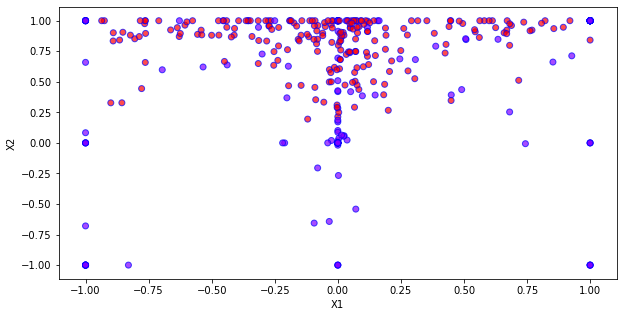

In [19]:
coef_sorted_args = np.abs(coef).argsort()[::-1]
most_important_two = coef_sorted_args[:2]
X1 = X[:, most_important_two[0]]
X2 = X[:, most_important_two[1]]

plt.figure(figsize=(10, 5))
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(
    X1,
    X2,
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

#### 2. Select first two principal components from task  2.2 .Make scatter plot using these two components, and color according to target variable.

<Figure size 432x288 with 0 Axes>

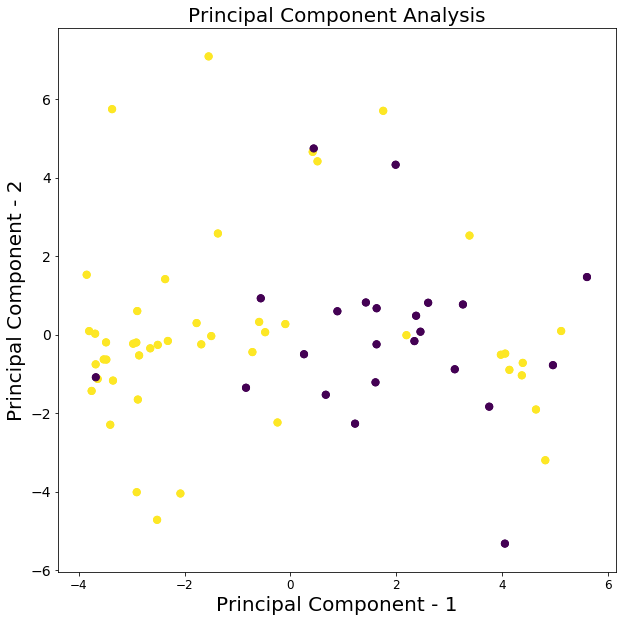

In [43]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    plt.scatter(X_transformed_tst_099[:, 0], X_transformed_tst_099[:, 1], c = y_test, s = 50)


